In [1]:
import datetime
import pytz
import glob
import re

import numpy as np
import pandas as pd

import pylab
from colour import Color
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bigbang import listserv
from bigbang.analysis.listserv import ListservArchive
from bigbang.analysis.listserv import ListservList
from bigbang.visualisation import stackedareachart
from bigbang.visualisation import lines
from bigbang.visualisation import utils
from bigbang.analysis.utils import (
    get_index_of_msgs_with_subject,
    get_index_of_msgs_with_datetime,
)

In [4]:
mlist_name = "3GPP_TSG_RAN_WG1_EUL_AH"
mlist = ListservList.from_mbox(
    name=mlist_name,
    filepath=f"path_to_bigbang/archives/3GPP/{mlist_name}.mbox",  # change this to your own folder structure
    include_body=False,
)

standard_release_info = pd.read_csv(
    "path_to_bigbang/bigbang/analysis/3GPP_standards_release_dates.csv",  # change this to your own folder structure
    sep=",",
    header=2,
    index_col=False,
)
standard_release_info["Start date"] = pd.to_datetime(
    standard_release_info["Start date"], format="%Y-%m-%d"
)
standard_release_year = [dt.year for dt in standard_release_info["Start date"]]

# Entities in Focus
eois = [
    "huawei.com",
    "huawei.comcc",
    "tencent.com",
    "xiaomi.com",
    "chinamobile.com",
    "hisilicon.comzte.com.cn",
    "chinatelecom.cn",
    "chinaunicom.cn",
    "catt.cn",
    "caict.ac.cn",
]

In [3]:
dic = mlist.get_threadsrootcount(per_address_field=["domain"], per_year=True)

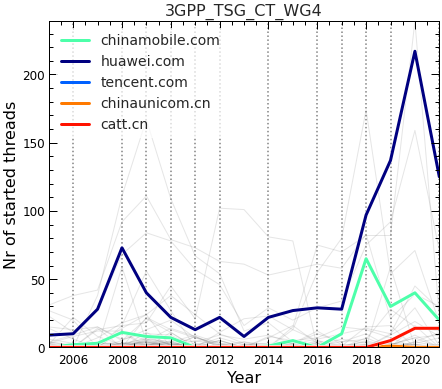

In [4]:
fig, axis = plt.subplots(
    1,
    1,
    figsize=(7, 6),
    facecolor="w",
    edgecolor="k",
)
lines.evolution_of_participation_1D(
    dic,
    ax=axis,
    entity_in_focus=eois,
    percentage=False,
)
for yr in standard_release_year:
    axis.axvline(x=yr, linestyle=":", color="k", alpha=0.5, zorder=0)

axis.set_title(mlist_name)
axis.set_xlim(2005, 2021)
# axis.set_ylim(0.0, 0.43)
axis.set_xlabel("Year")
axis.set_ylabel("Nr of started threads")
axis.legend(loc=2, edgecolor="white", facecolor="white", framealpha=0.7)

"""
plt.savefig(
    f"sums_started_threads_coun_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""

In [5]:
dic = mlist.get_localpartscount(
    header_fields=["from", "comments-to"], per_domain=True, per_year=True
)

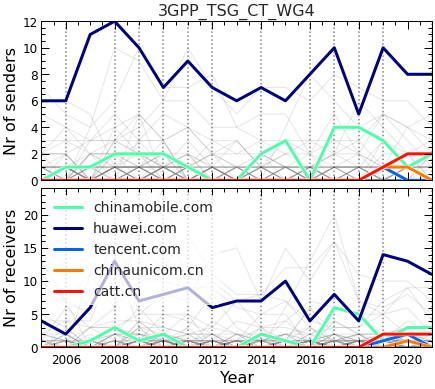

In [6]:
fig, axis = plt.subplots(
    2,
    1,
    figsize=(7, 6),
    sharex=True,
    sharey="row",
    # gridspec_kw={'height_ratios': [2, 1]},
    facecolor="w",
    edgecolor="k",
)
fig.subplots_adjust(
    hspace=0.05,
    wspace=0.0,
)

lines.evolution_of_participation_1D(
    dic["from"],
    ax=axis[0],
    entity_in_focus=eois,
    percentage=False,
)
lines.evolution_of_participation_1D(
    dic["comments-to"],
    ax=axis[1],
    entity_in_focus=eois,
    percentage=False,
)
for yr in standard_release_year:
    axis[0].axvline(x=yr, linestyle=":", color="k", alpha=0.5, zorder=0)
    axis[1].axvline(x=yr, linestyle=":", color="k", alpha=0.5, zorder=0)

axis[0].set_title(mlist_name)
axis[0].set_xlim(2005, 2021)
# axis[0].set_ylim(0.0, 0.32)

axis[1].set_xlim(2005, 2021)
# axis[1].set_ylim(0.0, 0.32)

axis[1].set_xlabel("Year")
axis[0].set_ylabel("Nr of senders")
axis[1].set_ylabel("Nr of receivers")
axis[1].legend(loc=2, edgecolor="white", facecolor="white", framealpha=0.7)

"""
plt.savefig(
    f"sums_localparts_coun_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""

In [7]:
dic = mlist.get_messagescount(
    header_fields=["from", "comments-to"], per_address_field="domain", per_year=True
)

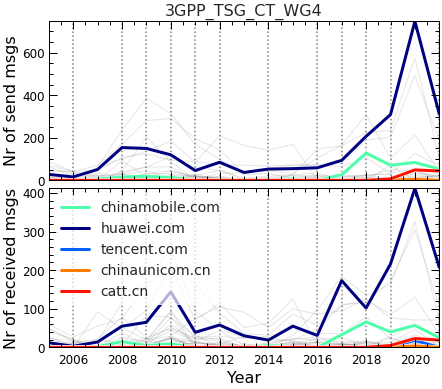

In [8]:
fig, axis = plt.subplots(
    2,
    1,
    figsize=(7, 6),
    sharex=True,
    sharey="row",
    # gridspec_kw={'height_ratios': [2, 1]},
    facecolor="w",
    edgecolor="k",
)
fig.subplots_adjust(
    hspace=0.05,
    wspace=0.0,
)

lines.evolution_of_participation_1D(
    dic["from"],
    ax=axis[0],
    entity_in_focus=eois,
    percentage=False,
)
lines.evolution_of_participation_1D(
    dic["comments-to"],
    ax=axis[1],
    entity_in_focus=eois,
    percentage=False,
)
for yr in standard_release_year:
    axis[0].axvline(x=yr, linestyle=":", color="k", alpha=0.5, zorder=0)
    axis[1].axvline(x=yr, linestyle=":", color="k", alpha=0.5, zorder=0)

axis[0].set_title(mlist_name)
axis[0].set_xlim(2005, 2021)
# axis[0].set_ylim(0.0, 0.49)

axis[1].set_xlim(2005, 2021)
# axis[1].set_ylim(0.0, 0.49)

axis[1].set_xlabel("Year")
axis[0].set_ylabel("Nr of send msgs")
axis[1].set_ylabel("Nr of received msgs")
axis[1].legend(loc=2, edgecolor="white", facecolor="white", framealpha=0.7)

"""
plt.savefig(
    f"sums_messages_coun_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""